### Import Libraries

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
from datetime import datetime as dt
import warnings
import seaborn as sns
import os
warnings.filterwarnings("ignore")

### Read in the dataset "Turku Finland"

In [369]:
df = pd.read_csv("Turku Finland 2019.csv", encoding="ISO-8859-1", sep = ";")
df.head()

,Created,Station ID,Station name,Start time,Stop time,Duration,Energy (Wh),Plug type,Cumulative energy (Wh),Colonna1
0,01/01/2019 01.47,1100,Puutarhakatu 4,01/01/2019 01.47,01/01/2019 01.47,1,0,AC,0,0
1,01/01/2019 14.40,1100,Puutarhakatu 4,01/01/2019 14.40,01/01/2019 15.44,64,3270,AC,3270,3065.625
2,02/01/2019 07.34,1140,Hämeenkatu 8,02/01/2019 07.34,02/01/2019 11.55,262,6460,AC,9730,1479.389313
3,02/01/2019 09.30,1100,Puutarhakatu 4,02/01/2019 09.30,02/01/2019 11.07,97,4880,AC,14610,3018.556701
4,02/01/2019 13.06,1100,Puutarhakatu 4,02/01/2019 13.06,02/01/2019 13.22,17,870,AC,15480,3070.588235


### Check for null values

In [370]:
df.isnull().any()

Created                   False
Station ID                False
Station name              False
Start time                False
Stop time                 False
Duration                  False
Energy (Wh)               False
Plug type                 False
Cumulative energy (Wh)    False
Colonna1                  False
dtype: bool

### Check data types and size

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7737 entries, 0 to 7736
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Created                 7737 non-null   object
 1   Station ID              7737 non-null   int64 
 2   Station name            7737 non-null   object
 3   Start time              7737 non-null   object
 4   Stop time               7737 non-null   object
 5   Duration                7737 non-null   int64 
 6   Energy (Wh)             7737 non-null   int64 
 7   Plug type               7737 non-null   object
 8   Cumulative energy (Wh)  7737 non-null   int64 
 9   Colonna1                7737 non-null   object
dtypes: int64(4), object(6)
memory usage: 604.6+ KB


### Change Duration time from minutes to hourly

In [372]:
#Energy was calculated in watts per hour (Wh), changing the duration to hours is appropriate for analysis
df['Duration'] = df['Duration'] / 60
df.head()

,Created,Station ID,Station name,Start time,Stop time,Duration,Energy (Wh),Plug type,Cumulative energy (Wh),Colonna1
0,01/01/2019 01.47,1100,Puutarhakatu 4,01/01/2019 01.47,01/01/2019 01.47,0.016667,0,AC,0,0
1,01/01/2019 14.40,1100,Puutarhakatu 4,01/01/2019 14.40,01/01/2019 15.44,1.066667,3270,AC,3270,3065.625
2,02/01/2019 07.34,1140,Hämeenkatu 8,02/01/2019 07.34,02/01/2019 11.55,4.366667,6460,AC,9730,1479.389313
3,02/01/2019 09.30,1100,Puutarhakatu 4,02/01/2019 09.30,02/01/2019 11.07,1.616667,4880,AC,14610,3018.556701
4,02/01/2019 13.06,1100,Puutarhakatu 4,02/01/2019 13.06,02/01/2019 13.22,0.283333,870,AC,15480,3070.588235


### Remove all 0 values from energy and duration column

In [373]:
#Values of 0 for 'Energy (Wh)' and 'Duration' is considered inaccurate data and must be removed...
#An EV is not charging if it recieved 0 energy from the charging station
#An EV was never at the charging station if it spent 0 time there
df.drop(df[df['Energy (Wh)'] == 0].index, inplace = True)
df.drop(df[df['Duration'] == 0].index, inplace = True)
df.head()

,Created,Station ID,Station name,Start time,Stop time,Duration,Energy (Wh),Plug type,Cumulative energy (Wh),Colonna1
1,01/01/2019 14.40,1100,Puutarhakatu 4,01/01/2019 14.40,01/01/2019 15.44,1.066667,3270,AC,3270,3065.625
2,02/01/2019 07.34,1140,Hämeenkatu 8,02/01/2019 07.34,02/01/2019 11.55,4.366667,6460,AC,9730,1479.389313
3,02/01/2019 09.30,1100,Puutarhakatu 4,02/01/2019 09.30,02/01/2019 11.07,1.616667,4880,AC,14610,3018.556701
4,02/01/2019 13.06,1100,Puutarhakatu 4,02/01/2019 13.06,02/01/2019 13.22,0.283333,870,AC,15480,3070.588235
5,02/01/2019 13.34,3022,Turun linja-autoasema,02/01/2019 13.34,02/01/2019 14.26,0.866667,2560,AC,18040,2953.846154


### Remove all durations greater than 24 hours

In [374]:
#EVs staying at charging stations for longer than 24 hours generated outliers...
#This was ineffective for finding trends, thus any durations over were removed
df.drop(df[df['Duration'] > 24].index, inplace = True)
df.head()

,Created,Station ID,Station name,Start time,Stop time,Duration,Energy (Wh),Plug type,Cumulative energy (Wh),Colonna1
1,01/01/2019 14.40,1100,Puutarhakatu 4,01/01/2019 14.40,01/01/2019 15.44,1.066667,3270,AC,3270,3065.625
2,02/01/2019 07.34,1140,Hämeenkatu 8,02/01/2019 07.34,02/01/2019 11.55,4.366667,6460,AC,9730,1479.389313
3,02/01/2019 09.30,1100,Puutarhakatu 4,02/01/2019 09.30,02/01/2019 11.07,1.616667,4880,AC,14610,3018.556701
4,02/01/2019 13.06,1100,Puutarhakatu 4,02/01/2019 13.06,02/01/2019 13.22,0.283333,870,AC,15480,3070.588235
5,02/01/2019 13.34,3022,Turun linja-autoasema,02/01/2019 13.34,02/01/2019 14.26,0.866667,2560,AC,18040,2953.846154


### Distribution of duration spent charging

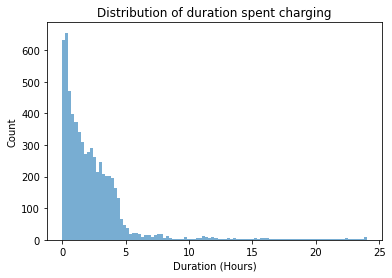

In [375]:
plt.hist(df["Duration"], bins=100, alpha=0.6)
plt.title("Distribution of duration spent charging")
plt.xlabel("Duration (Hours)")
plt.ylabel("Count")
plt.show()

### Same distribution with trendline

<AxesSubplot:xlabel='Duration', ylabel='Density'>

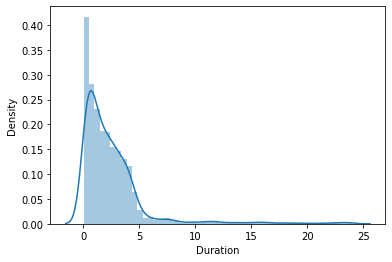

In [376]:
sns.distplot(df["Duration"])

In [377]:
print(df["Duration"].mean())
print(df["Duration"].median())
print(df["Duration"].max())
print(df["Duration"].min())

2.4768065268065267
1.7333333333333334
24.0
0.016666666666666666


### Weibull Distribution of duration spent charging 

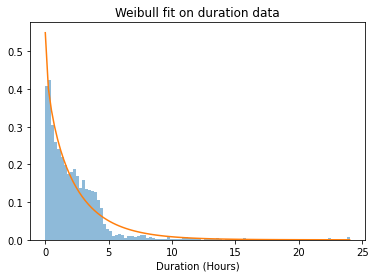

In [378]:
from scipy.stats import weibull_min 
plt.hist(df["Duration"], bins=100, density=True, alpha=0.5) 
shape, loc, scale = weibull_min.fit(df["Duration"], floc=0) 
x = np.linspace(df["Duration"].min(), df["Duration"].max(), 100) 
plt.plot(x, weibull_min(shape, loc, scale).pdf(x)) 
plt.title("Weibull fit on duration data") 
plt.xlabel("Duration (Hours)")
plt.show()

### Cumulative Distribution Function against Weibull

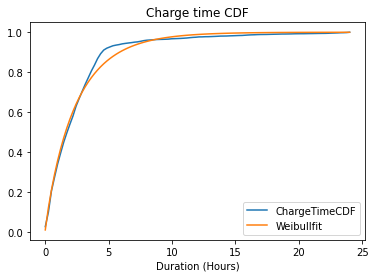

In [379]:
import statsmodels.distributions 
ecdf=statsmodels.distributions.ECDF(df["Duration"]) 
plt.plot(x,ecdf(x),label="ChargeTimeCDF") 
plt.plot(x,weibull_min(shape,loc,scale).cdf(x), label="Weibullfit")
plt.title("Charge time CDF") 
plt.xlabel("Duration (Hours)") 
plt.legend()
plt.show()

### Weibull Probability of duration spent charging

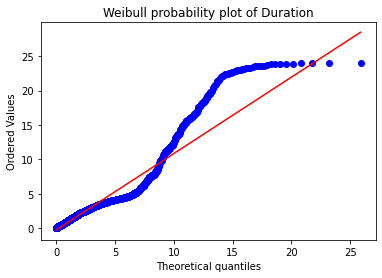

In [380]:
from scipy.stats import probplot, weibull_min 
probplot(df["Duration"], dist=weibull_min(shape,loc,scale), plot=plt.figure().add_subplot(111)) 
plt.title("Weibull probability plot of Duration")
plt.show()

In [381]:
import scipy.stats
scipy.stats.weibull_min(shape, loc, scale).ppf(0.5)

1.6085508527017165

### Lognormal distribution and probability

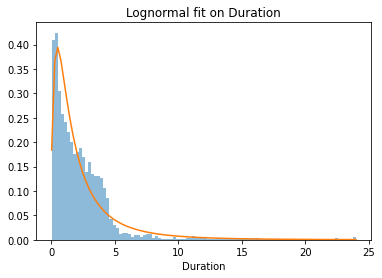

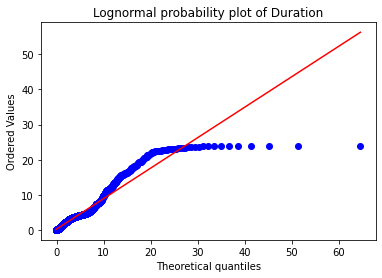

In [382]:
shape,loc,scale=scipy.stats.lognorm.fit(df["Duration"]) 
fitted=scipy.stats.lognorm(shape,loc,scale) 
plt.hist(df["Duration"],bins=100,density=True,alpha=0.5) 
x=np.linspace(df["Duration"].min(),df["Duration"].max(),100) 
plt.plot(x,fitted.pdf(x)) 
plt.title("Lognormal fit on Duration") 
plt.xlabel("Duration") 
scipy.stats.probplot(df["Duration"],dist=fitted, plot=plt.figure().add_subplot(111)) 
plt.title("Lognormal probability plot of Duration")
plt.show()

### CDF against Lognormal fit for Duration

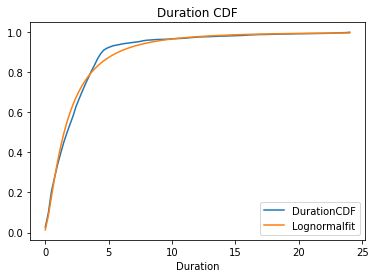

In [383]:
ecdf=statsmodels.distributions.ECDF(df["Duration"]) 
plt.plot(x,ecdf(x),label="DurationCDF") 
plt.plot(x,scipy.stats.lognorm(shape,loc,scale).cdf(x), label="Lognormalfit")
plt.title("Duration CDF") 
plt.xlabel("Duration") 
plt.legend()
plt.show()

In [384]:
scipy.stats.lognorm(shape,loc,scale).ppf(0.5)

1.497021512715421

### Distribution of energy generated (Wh)

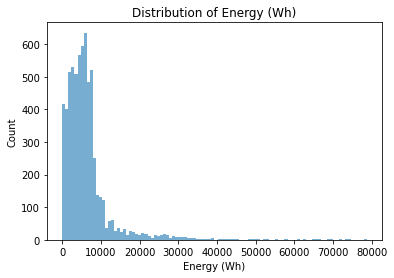

In [385]:
plt.hist(df["Energy (Wh)"], bins=100, alpha=0.6)
plt.title("Distribution of Energy (Wh)")
plt.xlabel("Energy (Wh)")
plt.ylabel("Count")
plt.show()

In [386]:
print(df["Energy (Wh)"].max())
print(df["Energy (Wh)"].min())
print(df["Energy (Wh)"].median())
print(df["Energy (Wh)"].mean())
print(df["Energy (Wh)"].mode())

78700
1
5113.0
6316.857808857809
0    38
Name: Energy (Wh), dtype: int64


### Same distribution with trendline

<AxesSubplot:xlabel='Energy (Wh)', ylabel='Density'>

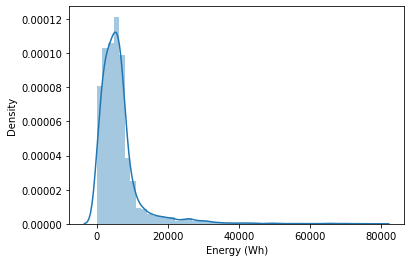

In [389]:
sns.distplot(df["Energy (Wh)"])

### Lognormalfit and probability of energy genereated

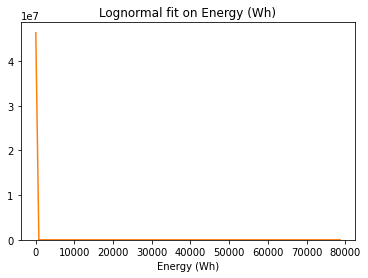

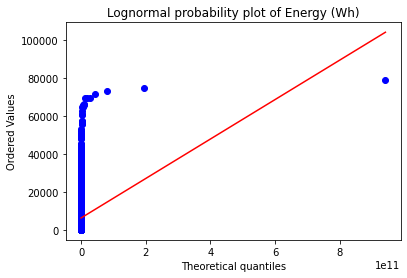

In [390]:
shape,loc,scale=scipy.stats.lognorm.fit(df["Energy (Wh)"]) 
fitted=scipy.stats.lognorm(shape,loc,scale) 
plt.hist(df["Energy (Wh)"],bins=100,density=True,alpha=0.5) 
x=np.linspace(df["Energy (Wh)"].min(),df["Energy (Wh)"].max(),100) 
plt.plot(x,fitted.pdf(x)) 
plt.title("Lognormal fit on Energy (Wh)") 
plt.xlabel("Energy (Wh)") 
scipy.stats.probplot(df["Energy (Wh)"],dist=fitted, plot=plt.figure().add_subplot(111)) 
plt.title("Lognormal probability plot of Energy (Wh)")
plt.show()

### CDF against Lognormalfit

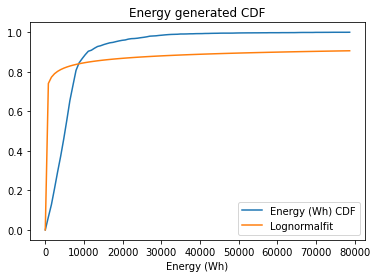

In [394]:
ecdf=statsmodels.distributions.ECDF(df["Energy (Wh)"]) 
plt.plot(x,ecdf(x),label="Energy (Wh) CDF") 
plt.plot(x,scipy.stats.lognorm(shape,loc,scale).cdf(x), label="Lognormalfit")
plt.title("Energy generated CDF") 
plt.xlabel("Energy (Wh)") 
plt.legend()
plt.show()

### Scatter plot duration against energy generated

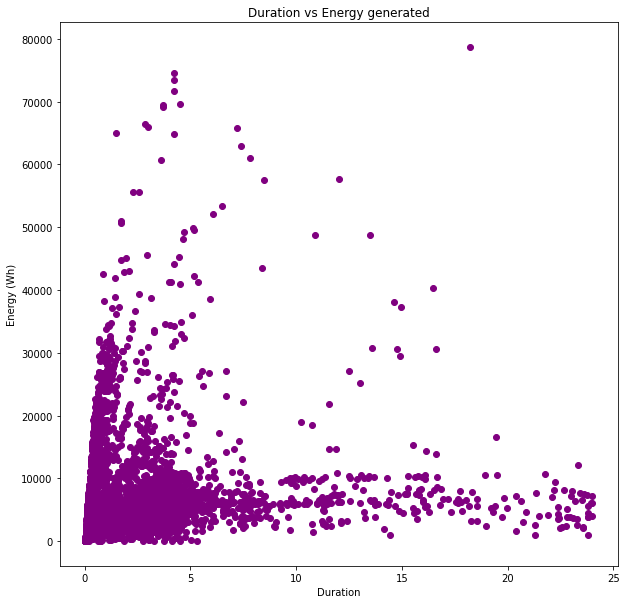

In [396]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df["Duration"].values,
           df["Energy (Wh)"],
           color='purple')
ax.set(xlabel="Duration",
       ylabel="Energy (Wh)",
       title="Duration vs Energy generated")
plt.show()

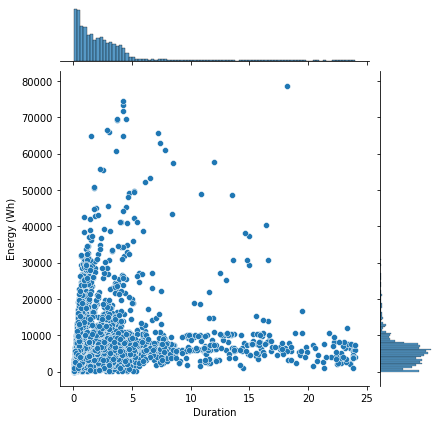

In [397]:
sns.jointplot(x="Duration", y="Energy (Wh)", data=df)